# Import libraries and load datasets

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [43]:
# Set the path to the directory containing the data files.
path = r'/Users/urvi/Desktop/Machine Learning with Python/Achivement 2/Climate wins 2/Data'

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Load the full dataset and the target variable dataset (y) using pandas
X = pd.read_csv(os.path.join(path,'Original data ', 'DATASET weather_prediction_imputed.csv'), index_col= False, header=0)
y = pd.read_csv(os.path.join(path,'Original Data ','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False, header=0)

In [46]:
X.head()

YEAR  MONTH  DAY  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  1960      1    1                  7            0.85           1.018   
1  1960      1    2                  6            0.84           1.018   
2  1960      1    3                  8            0.90           1.018   
3  1960      1    4                  3            0.92           1.018   
4  1960      1    5                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
0              6.5  ...                 4.9                     5   
1              6.1  ...                 5.0                     7   
2              8.5  ...                 4.1                     7   
3              6.3  ...                 2.3                     7   
4              3.0  ...                 4.3                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max  
0                6.0               10.9  
1                5.6               12.1  
2                8.1               12.9  
3                7.3               10.6  
4                3.0                8.4  

[5 rows x 138 columns]

In [47]:
tf.random.set_seed(42)

In [48]:
signals = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"]

In [49]:
locations = [
    "BASEL",
    "BELGRADE",
    "BUDAPEST",
    "DEBILT",
    "DUSSELDORF",
    "HEATHROW",
    "KASSEL",
    "LJUBLJANA",
    "MAASTRICHT",
    "MADRID",
    "MUNCHENB",
    "OSLO",
    "SONNBLICK",
    "STOCKHOLM",
    "VALENTIA",
    ]

In [50]:
activities = {
    0: 'Unpleasant',
    1: 'Pleasant'
    }

In [51]:
y.head()

YEAR  MONTH  DAY  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  1960      1    1                       0                          0   
1  1960      1    2                       0                          0   
2  1960      1    3                       0                          0   
3  1960      1    4                       0                          0   
4  1960      1    5                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

# Create the test and train data
Then convert to array

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
X_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
X_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)

In [54]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16065, 135) (16065, 15)
(6885, 135) (6885, 15)


In [55]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Perform the random forest algorithm

In [56]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7128540305010893


In [58]:
act = ["Unpleasant", "Pleasant"]

# Plot some forests as examples

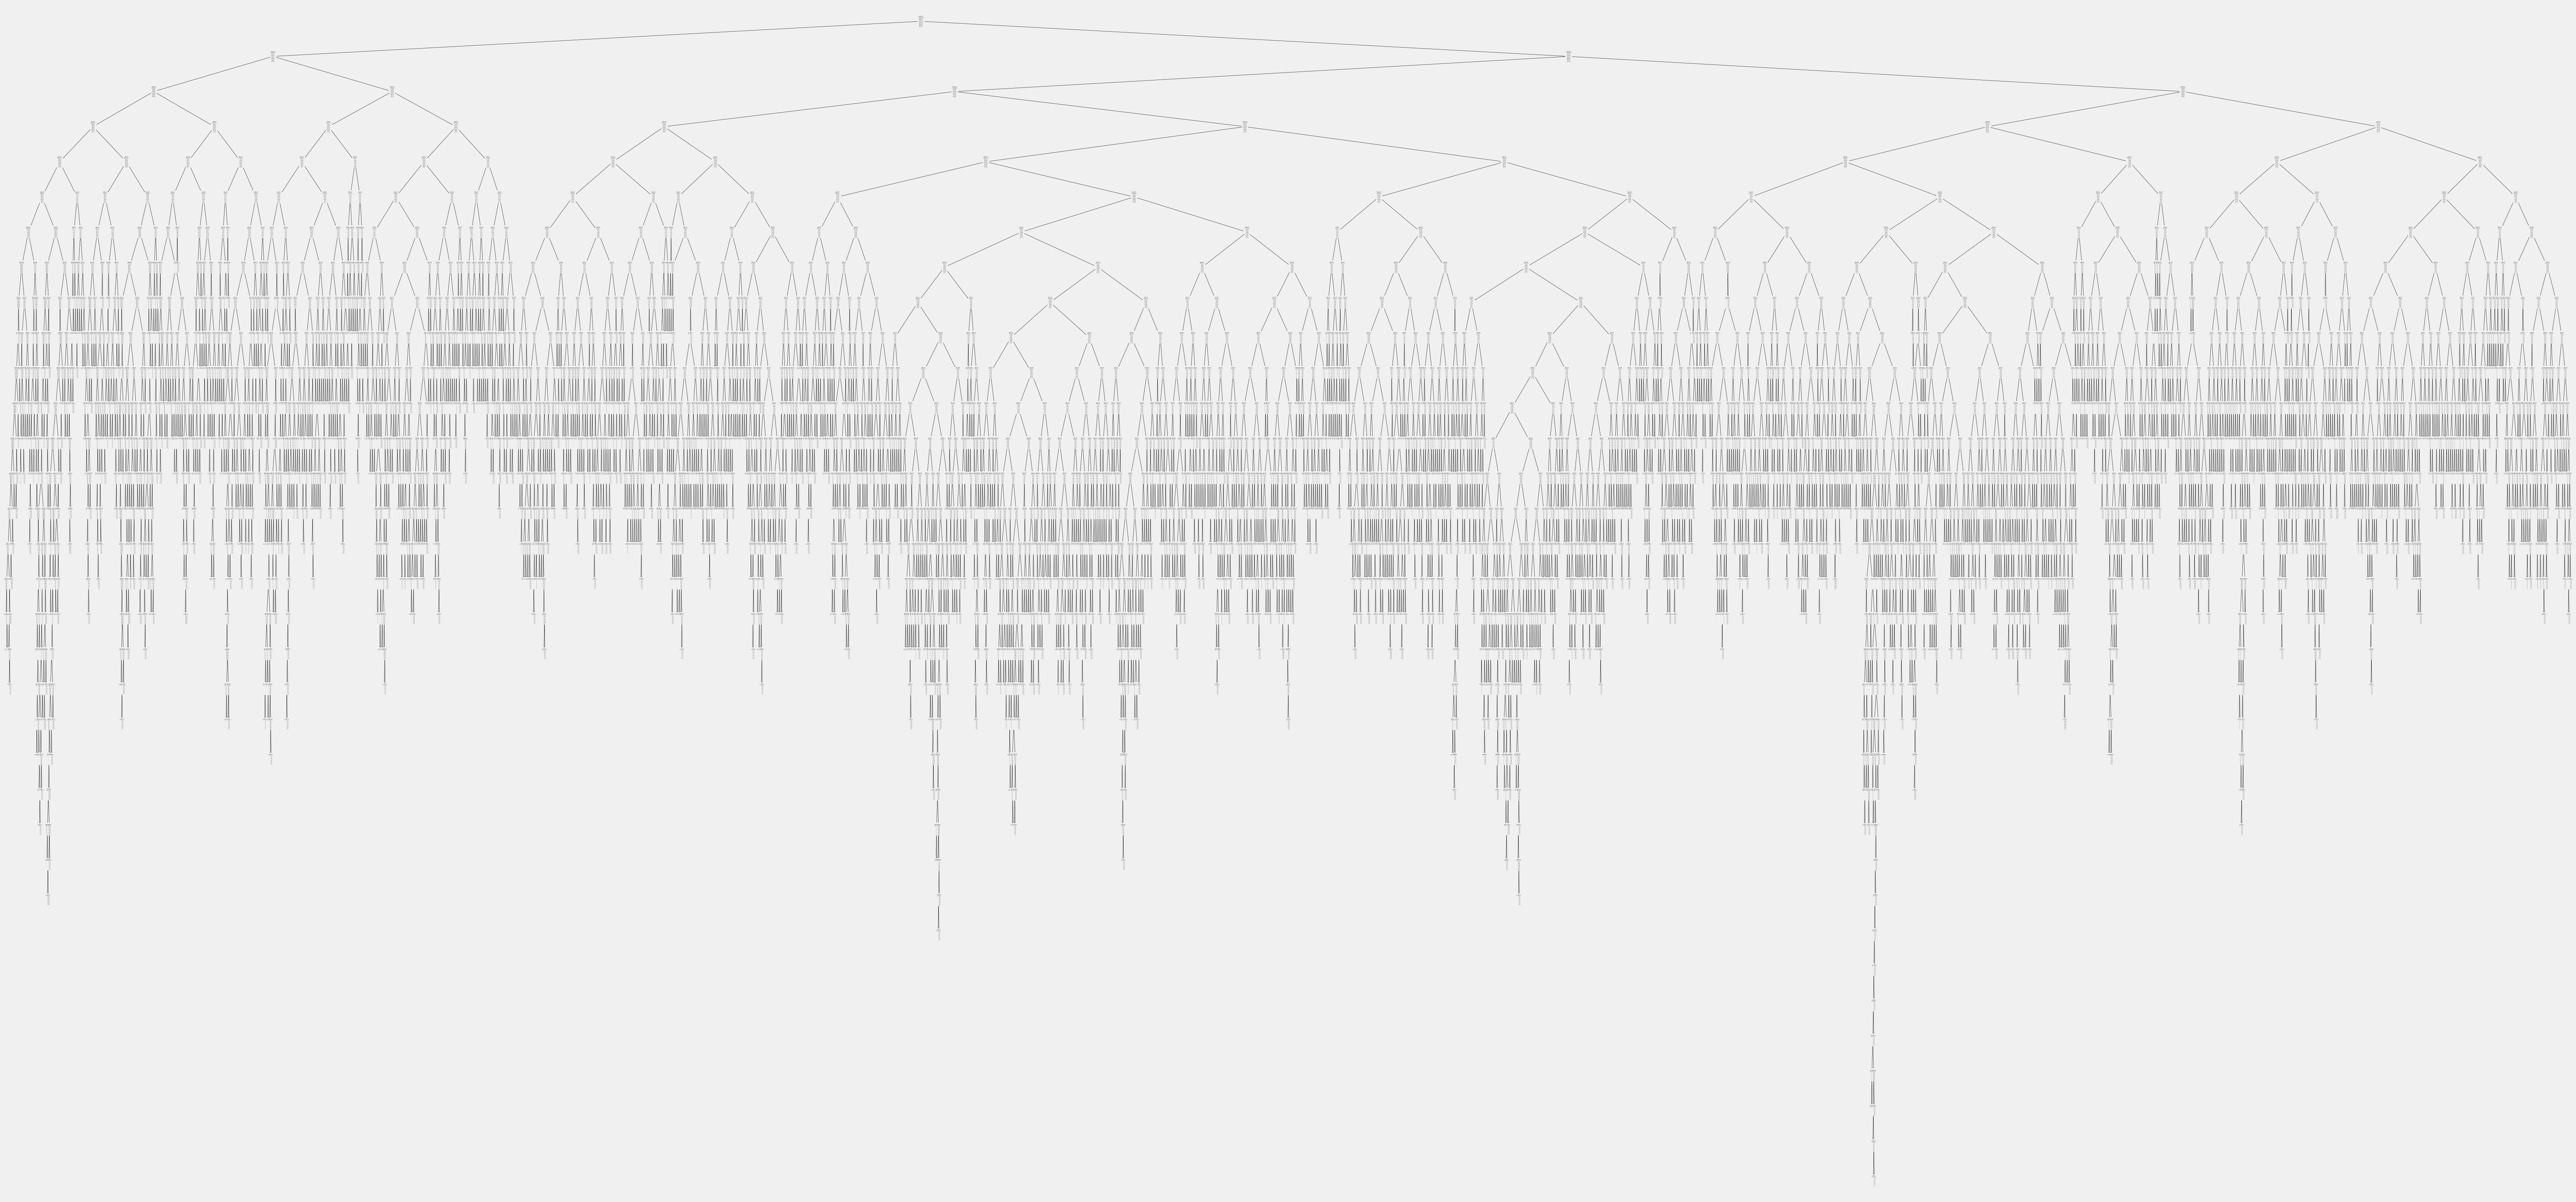

In [59]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[1], class_names=act);
#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [60]:
# Creating new path to save visuals
save_path = r'/Users/urvi/Desktop/Machine Learning with Python/Achivement 2/Climate wins 2/Visuals'

fig.savefig(f"{save_path}/decision_tree_weatherAll-01.png")

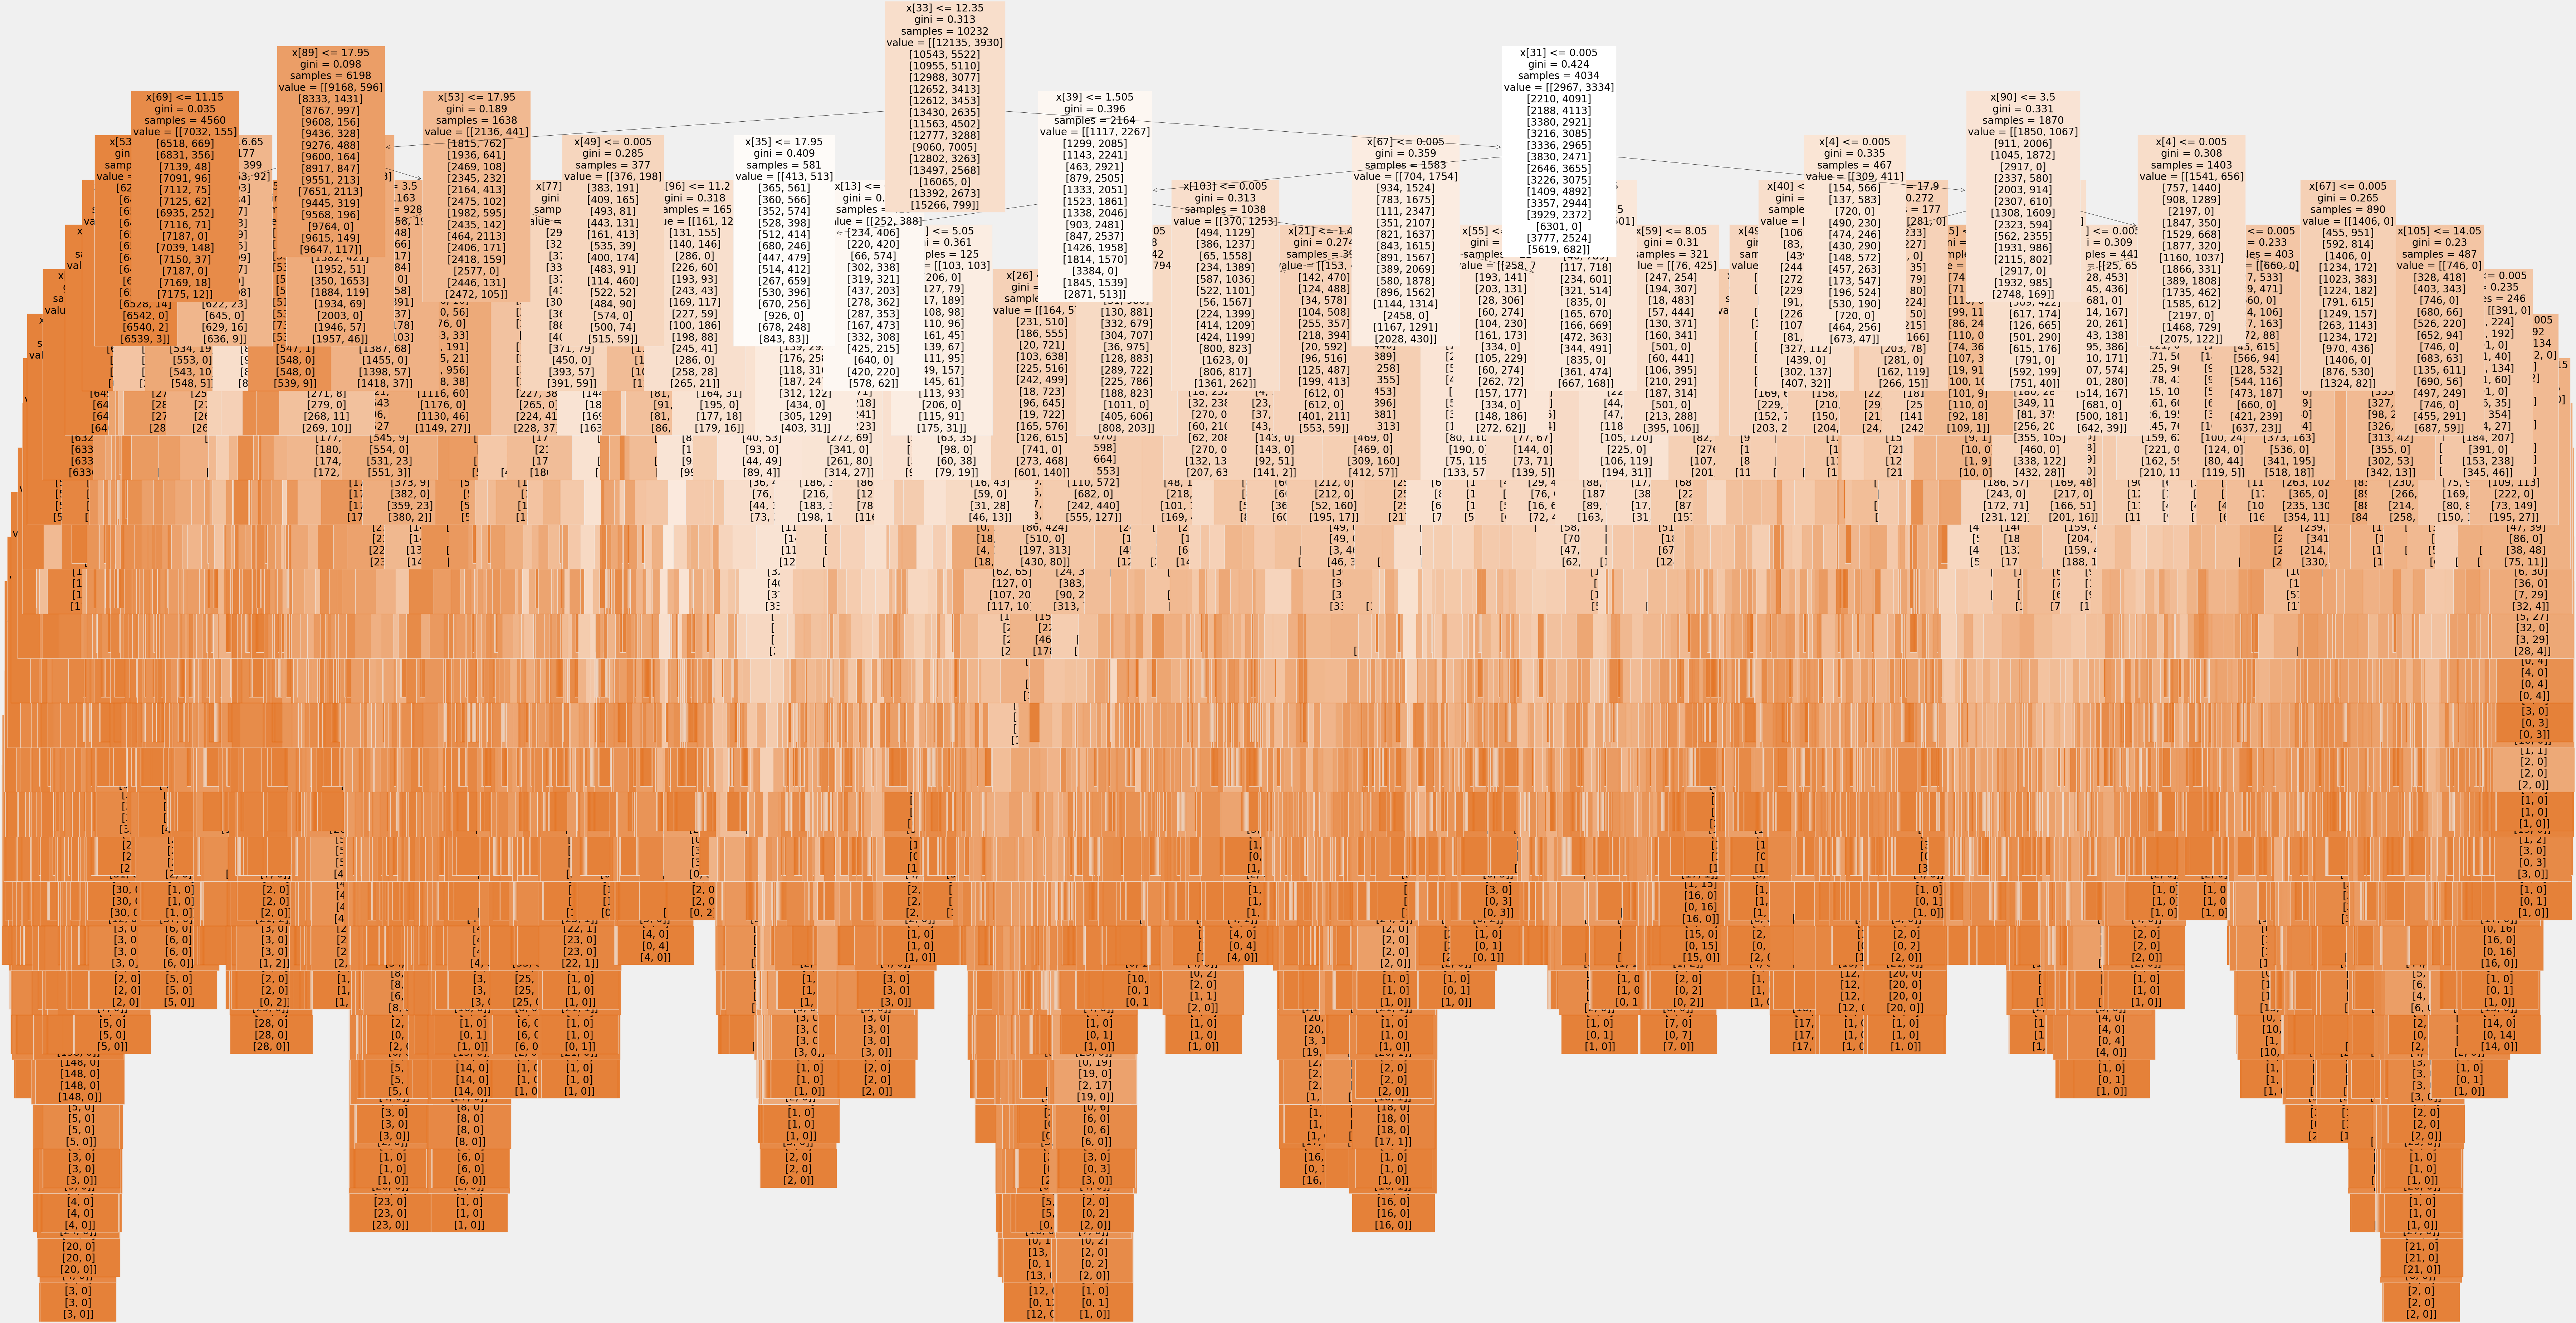

In [61]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=act, filled=True);

In [62]:
fig.savefig(f"{save_path}/decision_tree_weatherAll-02.png")

# Find the most relevant locations

In [63]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00217982, 0.00274017, 0.00186464, 0.0036942 , 0.0194157 ,
       0.00826561, 0.01585787, 0.00228984, 0.03486941, 0.00330818,
       0.00314939, 0.00302691, 0.00341996, 0.0211217 , 0.00365711,
       0.01082619, 0.00265229, 0.00800543, 0.00143793, 0.00177271,
       0.00165807, 0.00270053, 0.01885385, 0.00330571, 0.00919089,
       0.00325419, 0.01183618, 0.00315607, 0.00239307, 0.00380464,
       0.00434193, 0.0189508 , 0.00360541, 0.01921479, 0.00215567,
       0.02190478, 0.00468211, 0.00298412, 0.00268602, 0.00410014,
       0.02401268, 0.00689184, 0.02719587, 0.00222899, 0.03306492,
       0.00170458, 0.00315639, 0.00373849, 0.00342192, 0.01048608,
       0.00352916, 0.01826506, 0.00447638, 0.02035848, 0.00273951,
       0.00291267, 0.00304571, 0.00343482, 0.01270891, 0.00553222,
       0.00720178, 0.0024005 , 0.01235367, 0.00309248, 0.00276607,
       0.00278587, 0.00356091, 0.02214998, 0.00432262, 0.0103253 ,
       0.00437841, 0.0305874 , 0.00623086, 0.00257163, 0.00347

In [64]:
np.set_printoptions(threshold=1000)

In [80]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00217982, 0.00274017, 0.00186464, 0.0036942 , 0.0194157 ,
         0.00826561, 0.01585787, 0.00228984, 0.03486941],
        [0.00330818, 0.00314939, 0.00302691, 0.00341996, 0.0211217 ,
         0.00365711, 0.01082619, 0.00265229, 0.00800543],
        [0.00143793, 0.00177271, 0.00165807, 0.00270053, 0.01885385,
         0.00330571, 0.00919089, 0.00325419, 0.01183618],
        [0.00315607, 0.00239307, 0.00380464, 0.00434193, 0.0189508 ,
         0.00360541, 0.01921479, 0.00215567, 0.02190478],
        [0.00468211, 0.00298412, 0.00268602, 0.00410014, 0.02401268,
         0.00689184, 0.02719587, 0.00222899, 0.03306492],
        [0.00170458, 0.00315639, 0.00373849, 0.00342192, 0.01048608,
         0.00352916, 0.01826506, 0.00447638, 0.02035848],
        [0.00273951, 0.00291267, 0.00304571, 0.00343482, 0.01270891,
         0.00553222, 0.00720178, 0.0024005 , 0.01235367],
        [0.00309248, 0.00276607, 0.00278587, 0.00356091, 0.02214998,
         0.00432262, 0.0103253 , 0.0043784

In [81]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09117727, 0.05916715, 0.05401005, 0.07952717, 0.10784668,
       0.06913654, 0.0523298 , 0.08396903, 0.09489966, 0.06736557,
       0.0761252 , 0.05593113, 0.02538697, 0.06044743, 0.02268036])

In [82]:
important = pd.Series(sumarray, index = locations) #.sort_values(ascending = False)
important

BASEL         0.091177
BELGRADE      0.059167
BUDAPEST      0.054010
DEBILT        0.079527
DUSSELDORF    0.107847
HEATHROW      0.069137
KASSEL        0.052330
LJUBLJANA     0.083969
MAASTRICHT    0.094900
MADRID        0.067366
MUNCHENB      0.076125
OSLO          0.055931
SONNBLICK     0.025387
STOCKHOLM     0.060447
VALENTIA      0.022680
dtype: float64

DUSSELDORF    0.107847
MAASTRICHT    0.094900
BASEL         0.091177
LJUBLJANA     0.083969
DEBILT        0.079527
MUNCHENB      0.076125
HEATHROW      0.069137
MADRID        0.067366
STOCKHOLM     0.060447
BELGRADE      0.059167
OSLO          0.055931
BUDAPEST      0.054010
KASSEL        0.052330
SONNBLICK     0.025387
VALENTIA      0.022680
dtype: float64
Importance for MADRID: 0.0673655730412865


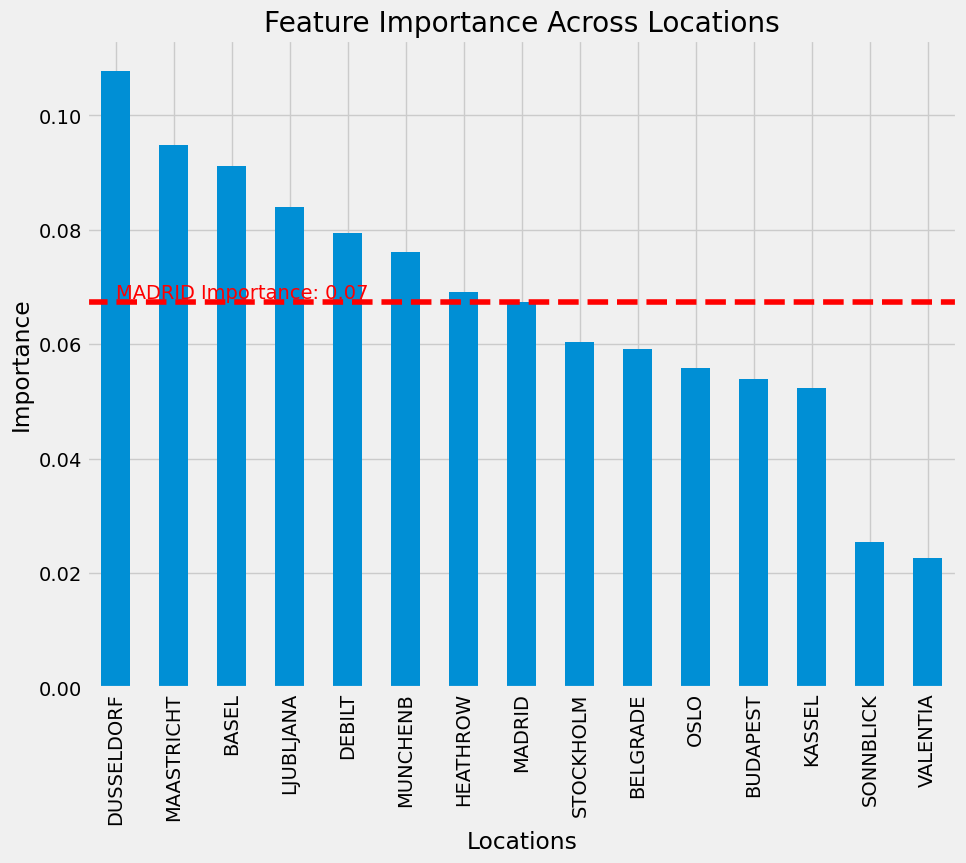

In [68]:
# Assuming sumarray contains importance values and locations contains corresponding station names
important = pd.Series(sumarray, index=locations).sort_values(ascending=False)

# Print all sorted values to check
print(important)

# If you want to focus on 'MADRID' specifically:
if 'MADRID' in important:
    madrid_importance = important['MADRID']
    print(f"Importance for MADRID: {madrid_importance}")

    # Optionally, visualize the importance of MADRID compared to others
    plt.figure(figsize=(10, 8))
    important.plot(kind='bar')
    plt.title('Feature Importance Across Locations')
    plt.xlabel('Locations')
    plt.ylabel('Importance')
    plt.axhline(y=madrid_importance, color='r', linestyle='--')
    plt.text(0, madrid_importance, f'MADRID Importance: {madrid_importance:.2f}', color='red', verticalalignment='bottom')
    plt.show()
else:
    print("MADRID not found in the locations.")
    plt.savefig(f"{save_path}/Location_Importances Madrid.png")

# Find the most important measures

In [69]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00217982, 0.00274017, 0.00186464, 0.0036942 , 0.0194157 ,
       0.00826561, 0.01585787, 0.00228984, 0.03486941, 0.00330818,
       0.00314939, 0.00302691, 0.00341996, 0.0211217 , 0.00365711,
       0.01082619, 0.00265229, 0.00800543, 0.00143793, 0.00177271,
       0.00165807, 0.00270053, 0.01885385, 0.00330571, 0.00919089,
       0.00325419, 0.01183618, 0.00315607, 0.00239307, 0.00380464,
       0.00434193, 0.0189508 , 0.00360541, 0.01921479, 0.00215567,
       0.02190478, 0.00468211, 0.00298412, 0.00268602, 0.00410014,
       0.02401268, 0.00689184, 0.02719587, 0.00222899, 0.03306492,
       0.00170458, 0.00315639, 0.00373849, 0.00342192, 0.01048608,
       0.00352916, 0.01826506, 0.00447638, 0.02035848, 0.00273951,
       0.00291267, 0.00304571, 0.00343482, 0.01270891, 0.00553222,
       0.00720178, 0.0024005 , 0.01235367, 0.00309248, 0.00276607,
       0.00278587, 0.00356091, 0.02214998, 0.00432262, 0.0103253 ,
       0.00437841, 0.0305874 , 0.00623086, 0.00257163, 0.00347

In [70]:
np.set_printoptions(threshold=1000)

In [71]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00217982, 0.00274017, 0.00186464, 0.0036942 , 0.0194157 ,
         0.00826561, 0.01585787, 0.00228984, 0.03486941],
        [0.00330818, 0.00314939, 0.00302691, 0.00341996, 0.0211217 ,
         0.00365711, 0.01082619, 0.00265229, 0.00800543],
        [0.00143793, 0.00177271, 0.00165807, 0.00270053, 0.01885385,
         0.00330571, 0.00919089, 0.00325419, 0.01183618],
        [0.00315607, 0.00239307, 0.00380464, 0.00434193, 0.0189508 ,
         0.00360541, 0.01921479, 0.00215567, 0.02190478],
        [0.00468211, 0.00298412, 0.00268602, 0.00410014, 0.02401268,
         0.00689184, 0.02719587, 0.00222899, 0.03306492],
        [0.00170458, 0.00315639, 0.00373849, 0.00342192, 0.01048608,
         0.00352916, 0.01826506, 0.00447638, 0.02035848],
        [0.00273951, 0.00291267, 0.00304571, 0.00343482, 0.01270891,
         0.00553222, 0.00720178, 0.0024005 , 0.01235367],
        [0.00309248, 0.00276607, 0.00278587, 0.00356091, 0.02214998,
         0.00432262, 0.0103253 , 0.0043784

In [72]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04206351, 0.04066811, 0.04289492, 0.05406042, 0.21956159,
       0.06674691, 0.18996841, 0.0536663 , 0.29036983])

In [73]:
important = pd.Series(sumarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.042064
humidity            0.040668
pressure            0.042895
global_radiation    0.054060
precipitation       0.219562
sunshine            0.066747
temp_mean           0.189968
temp_min            0.053666
temp_max            0.290370
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


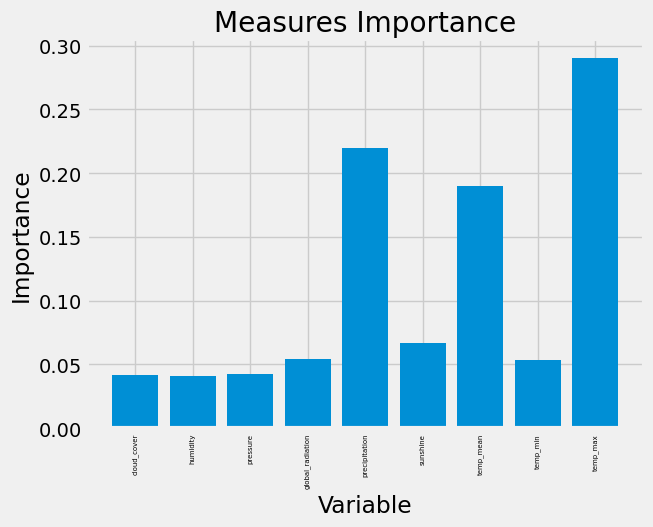

In [74]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Measures Importance')
plt.savefig(f"{save_path}/Measure_ImportancesAll.png")

### The most improatnt measures are:
precipitation

temp_mean

temp_max

They are significantly more important than the other measures of 'pleasantness'.

they are also better at indicating than any of the individual locations.